### An example showing the plot_precision_recall_curve method used by a scikit-learn classifier

In this example, we'll be plotting a `precision_recall_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.metrics.plot_precision_recall_curve` method.

In [1]:
from sklearn.datasets import (
    make_classification,
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
import numpy as np; np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

# Import scikit-plot
import scikitplot as skplt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
# Load the data
X, y = data_10_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

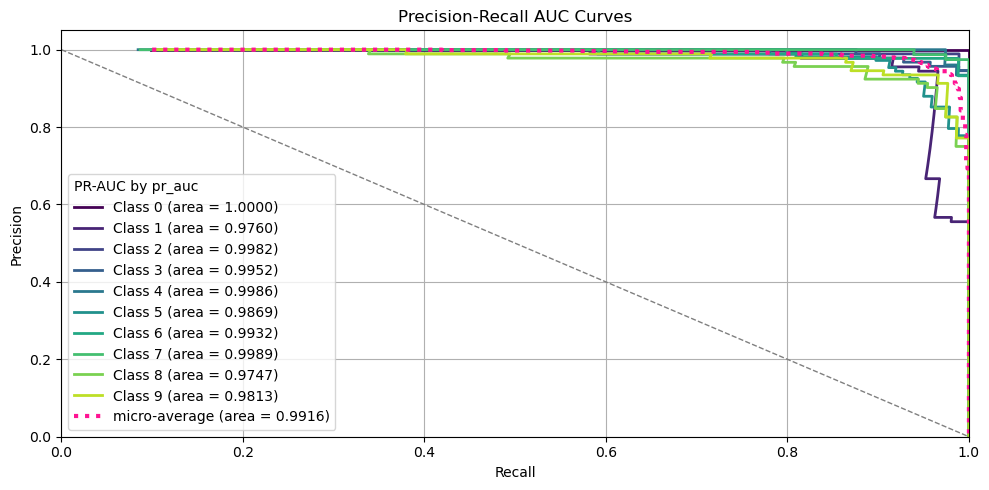

In [3]:
# Create an instance of the LogisticRegression
model = LogisticRegression(max_iter=int(1e5), random_state=0).fit(X_train, y_train)

# Perform predictions
y_val_prob = model.predict_proba(X_val)

# Plot!
ax = skplt.metrics.plot_precision_recall(
    y_val, y_val_prob
);

## Keras

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


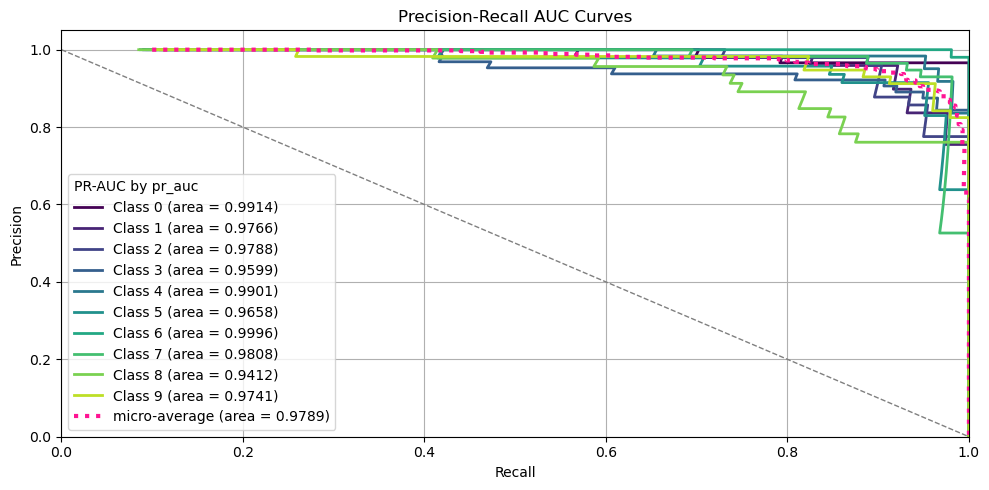

In [4]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scikitplot as skplt

# Load the digits dataset
X, y = load_digits(return_X_y=True)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

# Convert labels to one-hot encoding
Y_train = tf.keras.utils.to_categorical(y_train)
Y_val = tf.keras.utils.to_categorical(y_val)

# Define a simple TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(
    X_train, Y_train,
    batch_size=64,
    epochs=10,
    validation_data=(X_val, Y_val),
    verbose=0
)

# Predict probabilities on the validation set
y_probas = model.predict(X_val)

# Plot precision-recall curves
skplt.metrics.plot_precision_recall(y_val, y_probas)
plt.show()